In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_data = pd.read_csv('train.csv.zip')
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
test_data = pd.read_csv('test.csv.zip')
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
sample_submit = pd.read_csv('sampleSubmission.csv.zip')
sample_submit.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
sample_submit.columns.value_counts().sum()

40

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   Dates       884262 non-null  object 
 2   DayOfWeek   884262 non-null  object 
 3   PdDistrict  884262 non-null  object 
 4   Address     884262 non-null  object 
 5   X           884262 non-null  float64
 6   Y           884262 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 47.2+ MB


In [10]:
type(train_data['Dates'])

pandas.core.series.Series

In [11]:
train_data['year'] = train_data['Dates'].apply(lambda x : x.split()[0].split('-')[0])
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015


In [12]:
train_data['Month'] = train_data['Dates'].apply(lambda x : x.split()[0].split('-')[1])
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05


In [13]:
train_data['Day'] = train_data['Dates'].apply(lambda x : x.split()[0].split('-')[2])
time = train_data['Dates'].apply(lambda x : x.split()[1].split(':')[:2])

In [14]:
train_data['time'] = [int(x[0])*60 + int(x[1]) for x in time]
train_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410


In [15]:
train_data.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
year          0
Month         0
Day           0
time          0
dtype: int64

In [16]:
train_data.drop('Dates',axis = 1, inplace = True)

In [17]:
test_data['year'] = test_data['Dates'].apply(lambda x : x.split()[0].split('-')[0])
test_data['Month'] = test_data['Dates'].apply(lambda x : x.split()[0].split('-')[1])
test_data['Day'] = test_data['Dates'].apply(lambda x : x.split()[0].split('-')[2])
time = test_data['Dates'].apply(lambda x : x.split()[1].split(':')[:2])
test_data['time'] = [int(x[0])*60 + int(x[1]) for x in time]
test_data.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,year,Month,Day,time
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,05,10,1439
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,05,10,1431
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,05,10,1430
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425


In [18]:
test_data.drop('Dates',axis = 1, inplace = True)

In [19]:
print(train_data.columns)
print(test_data.columns)

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'year', 'Month', 'Day', 'time'],
      dtype='object')
Index(['Id', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y', 'year', 'Month',
       'Day', 'time'],
      dtype='object')


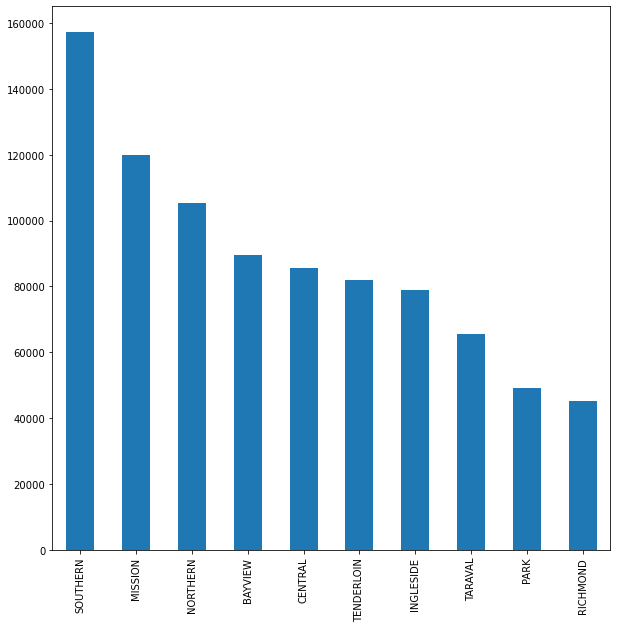

In [20]:
train_data.PdDistrict.value_counts().plot(kind = 'bar',figsize = (10,10))
plt.show()

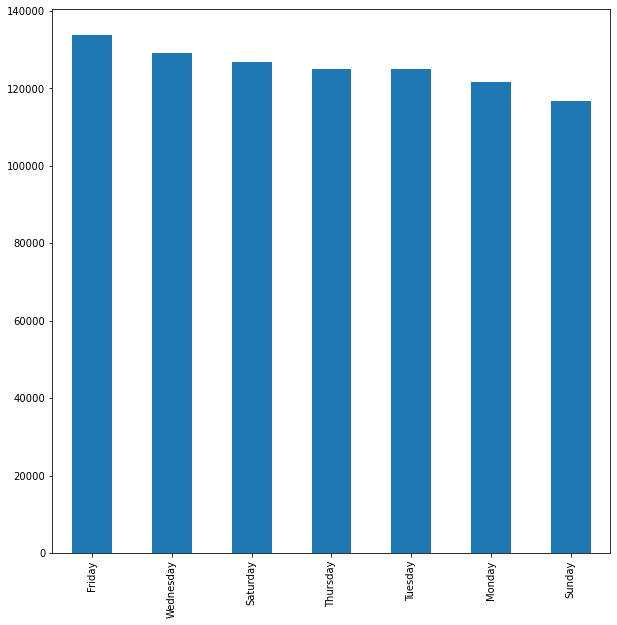

In [21]:
train_data.DayOfWeek.value_counts().plot(kind = 'bar',figsize = (10,10))
plt.show()

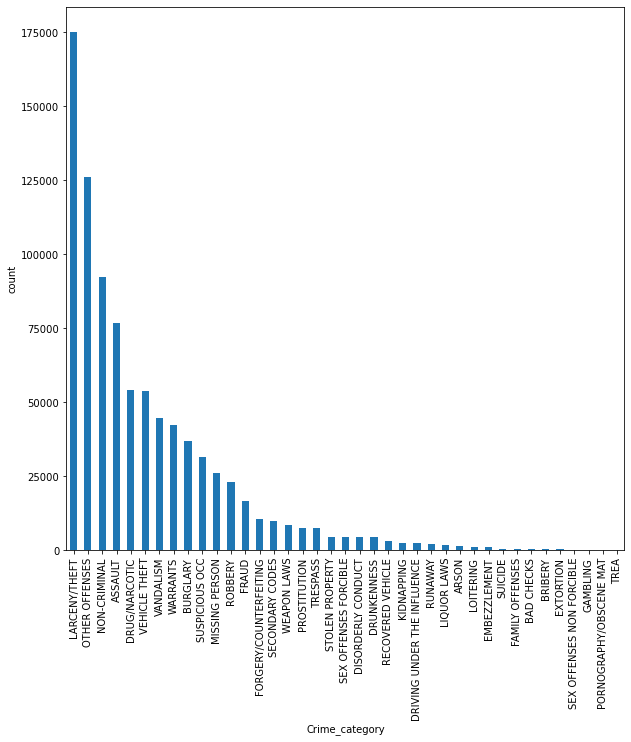

In [22]:
train_data['Category'].value_counts().plot(kind = 'bar',figsize = (10,10))
plt.ylabel('count')
plt.xlabel('Crime_category')
plt.show()

In [23]:
train_data['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)
test_data['DayOfWeek'].replace(to_replace=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],value=[i for i in range(0,7)],inplace=True)
train_data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time
0,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['DayOfWeek'] = le.fit_transform(train_data['DayOfWeek'])
train_data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time
0,WARRANTS,WARRANT ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410


In [25]:
test_data['DayOfWeek'] = le.fit_transform(test_data['DayOfWeek'])
test_data.head()

,Id,DayOfWeek,PdDistrict,Address,X,Y,year,Month,Day,time
0,0,6,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051,2015,05,10,1439
1,1,6,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432,2015,05,10,1431
2,2,6,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212,2015,05,10,1430
3,3,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425
4,4,6,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425


In [26]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['PdDistrict'])],axis = 1)
train_data.drop('PdDistrict',axis = 1, inplace = True)
train_data.head()

,Category,Descript,DayOfWeek,Resolution,Address,X,Y,year,Month,Day,...,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,WARRANTS,WARRANT ARREST,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,...,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,...,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,...,0,0,0,0,1,0,0,0,0,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,...,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,2,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,...,0,0,0,0,0,1,0,0,0,0


In [27]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['PdDistrict'])],axis = 1)
test_data.drop('PdDistrict',axis = 1, inplace = True)
test_data.head()

,Id,DayOfWeek,Address,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,6,2000 Block of THOMAS AV,-122.399588,37.735051,2015,05,10,1439,1,0,0,0,0,0,0,0,0,0
1,1,6,3RD ST / REVERE AV,-122.391523,37.732432,2015,05,10,1431,1,0,0,0,0,0,0,0,0,0
2,2,6,2000 Block of GOUGH ST,-122.426002,37.792212,2015,05,10,1430,0,0,0,0,1,0,0,0,0,0
3,3,6,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425,0,0,1,0,0,0,0,0,0,0
4,4,6,4700 Block of MISSION ST,-122.437394,37.721412,2015,05,10,1425,0,0,1,0,0,0,0,0,0,0


In [28]:
print(train_data.shape)
print(test_data.shape)

(878049, 21)
(884262, 19)


In [29]:
train_data.drop(['Descript','Resolution','Address'],axis = 1, inplace = True)
test_data.drop('Address',axis = 1, inplace = True)
print(train_data.shape)
print(test_data.shape)

(878049, 18)
(884262, 18)


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  int64  
 2   X           878049 non-null  float64
 3   Y           878049 non-null  float64
 4   year        878049 non-null  object 
 5   Month       878049 non-null  object 
 6   Day         878049 non-null  object 
 7   time        878049 non-null  int64  
 8   BAYVIEW     878049 non-null  uint8  
 9   CENTRAL     878049 non-null  uint8  
 10  INGLESIDE   878049 non-null  uint8  
 11  MISSION     878049 non-null  uint8  
 12  NORTHERN    878049 non-null  uint8  
 13  PARK        878049 non-null  uint8  
 14  RICHMOND    878049 non-null  uint8  
 15  SOUTHERN    878049 non-null  uint8  
 16  TARAVAL     878049 non-null  uint8  
 17  TENDERLOIN  878049 non-null  uint8  
dtypes: float64(2), int64(2), object(4), uint8(10

In [32]:
train_data[train_data["Y"] == max(train_data["Y"])]

,Category,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
660485,LARCENY/THEFT,4,-120.5,90.0,2005,12,30,1020,0,0,0,0,0,0,0,0,0,1
660711,ASSAULT,4,-120.5,90.0,2005,12,30,34,1,0,0,0,0,0,0,0,0,0
660712,ASSAULT,4,-120.5,90.0,2005,12,30,34,1,0,0,0,0,0,0,0,0,0
661106,NON-CRIMINAL,3,-120.5,90.0,2005,12,29,7,0,0,0,0,0,0,0,0,0,1
666430,OTHER OFFENSES,2,-120.5,90.0,2005,11,30,685,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,OTHER OFFENSES,2,-120.5,90.0,2003,06,11,529,0,0,1,0,0,0,0,0,0,0
845842,OTHER OFFENSES,0,-120.5,90.0,2003,06,09,565,0,0,1,0,0,0,0,0,0,0
852880,SEX OFFENSES FORCIBLE,4,-120.5,90.0,2003,05,02,60,0,0,0,0,0,0,0,1,0,0
857248,ROBBERY,0,-120.5,90.0,2003,04,14,990,1,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler
std_sc = StandardScaler()
std_sc.fit(train_data[["X","Y","time"]]) 
train_data[["X","Y","time"]]  = std_sc.transform(train_data[["X","Y","time"]])
train_data.head()

,Category,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,WARRANTS,2,-0.107902,0.007832,2015,05,13,1.544919,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,2,-0.107902,0.007832,2015,05,13,1.544919,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,2,-0.057541,0.064335,2015,05,13,1.494106,0,0,0,0,1,0,0,0,0,0
3,LARCENY/THEFT,2,-0.144262,0.065338,2015,05,13,1.486484,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,2,-0.531112,0.001140,2015,05,13,1.486484,0,0,0,0,0,1,0,0,0,0


In [34]:
std_sc.fit(test_data[["X","Y","time"]]) 
test_data[["X","Y","time"]]  = std_sc.transform(test_data[["X","Y","time"]])
test_data.head()

,Id,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,0,6,0.745700,-0.075130,2015,05,10,1.560211,1,0,0,0,0,0,0,0,0,0
1,1,6,1.005982,-0.080531,2015,05,10,1.539919,1,0,0,0,0,0,0,0,0,0
2,2,6,-0.106786,0.042772,2015,05,10,1.537382,0,0,0,0,1,0,0,0,0,0
3,3,6,-0.474449,-0.103262,2015,05,10,1.524699,0,0,1,0,0,0,0,0,0,0
4,4,6,-0.474449,-0.103262,2015,05,10,1.524699,0,0,1,0,0,0,0,0,0,0


In [35]:
train_data["rot45_X"] = .707* train_data["Y"] + .707* train_data["X"]
train_data["rot45_Y"] = .707* train_data["Y"] - .707* train_data["X"]

train_data["rot30_X"] = (1.732/2)* train_data["X"] + (1./2)* train_data["Y"]
train_data["rot30_Y"] = (1.732/2)* train_data["Y"] - (1./2)* train_data["X"]

train_data["rot60_X"] = (1./2)* train_data["X"] + (1.732/2)* train_data["Y"]
train_data["rot60_Y"] = (1./2)* train_data["Y"] - (1.732/2)* train_data["X"]

train_data["radial_r"] = np.sqrt( np.power(train_data["Y"],2) + np.power(train_data["X"],2) )
train_data.head()

,Category,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,...,SOUTHERN,TARAVAL,TENDERLOIN,rot45_X,rot45_Y,rot30_X,rot30_Y,rot60_X,rot60_Y,radial_r
0,WARRANTS,2,-0.107902,0.007832,2015,05,13,1.544919,0,0,...,0,0,0,-0.070750,0.081824,-0.089527,0.060733,-0.047169,0.097359,0.108186
1,OTHER OFFENSES,2,-0.107902,0.007832,2015,05,13,1.544919,0,0,...,0,0,0,-0.070750,0.081824,-0.089527,0.060733,-0.047169,0.097359,0.108186
2,OTHER OFFENSES,2,-0.057541,0.064335,2015,05,13,1.494106,0,0,...,0,0,0,0.004803,0.086166,-0.017663,0.084484,0.026943,0.081998,0.086313
3,LARCENY/THEFT,2,-0.144262,0.065338,2015,05,13,1.486484,0,0,...,0,0,0,-0.055799,0.148187,-0.092262,0.128713,-0.015549,0.157600,0.158368
4,LARCENY/THEFT,2,-0.531112,0.001140,2015,05,13,1.486484,0,0,...,0,0,0,-0.374690,0.376302,-0.459373,0.266543,-0.264569,0.460513,0.531113


In [36]:
test_data["rot45_X"] = .707* test_data["Y"] + .707* test_data["X"]
test_data["rot45_Y"] = .707* test_data["Y"] - .707* test_data["X"]

test_data["rot30_X"] = (1.732/2)* test_data["X"] + (1./2)* test_data["Y"]
test_data["rot30_Y"] = (1.732/2)* test_data["Y"] - (1./2)* test_data["X"]

test_data["rot60_X"] = (1./2)* test_data["X"] + (1.732/2)* test_data["Y"]
test_data["rot60_Y"] = (1./2)* test_data["Y"] - (1.732/2)* test_data["X"]

test_data["radial_r"] = np.sqrt( np.power(test_data["Y"],2) + np.power(test_data["X"],2) )
test_data.head()

,Id,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,...,SOUTHERN,TARAVAL,TENDERLOIN,rot45_X,rot45_Y,rot30_X,rot30_Y,rot60_X,rot60_Y,radial_r
0,0,6,0.745700,-0.075130,2015,05,10,1.560211,1,0,...,0,0,0,0.474093,-0.580327,0.608211,-0.437913,0.307788,-0.683341,0.749475
1,1,6,1.005982,-0.080531,2015,05,10,1.539919,1,0,...,0,0,0,0.654293,-0.768164,0.830914,-0.572731,0.433251,-0.911446,1.009200
2,2,6,-0.106786,0.042772,2015,05,10,1.537382,0,0,...,0,0,0,-0.045258,0.105737,-0.071091,0.090433,-0.016353,0.113863,0.115033
3,3,6,-0.474449,-0.103262,2015,05,10,1.524699,0,0,...,0,0,0,-0.408441,0.262429,-0.462504,0.147800,-0.326649,0.359242,0.485556
4,4,6,-0.474449,-0.103262,2015,05,10,1.524699,0,0,...,0,0,0,-0.408441,0.262429,-0.462504,0.147800,-0.326649,0.359242,0.485556


In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   DayOfWeek   878049 non-null  int64  
 2   X           878049 non-null  float64
 3   Y           878049 non-null  float64
 4   year        878049 non-null  object 
 5   Month       878049 non-null  object 
 6   Day         878049 non-null  object 
 7   time        878049 non-null  float64
 8   BAYVIEW     878049 non-null  uint8  
 9   CENTRAL     878049 non-null  uint8  
 10  INGLESIDE   878049 non-null  uint8  
 11  MISSION     878049 non-null  uint8  
 12  NORTHERN    878049 non-null  uint8  
 13  PARK        878049 non-null  uint8  
 14  RICHMOND    878049 non-null  uint8  
 15  SOUTHERN    878049 non-null  uint8  
 16  TARAVAL     878049 non-null  uint8  
 17  TENDERLOIN  878049 non-null  uint8  
 18  rot45_X     878049 non-null  float64
 19  ro

In [38]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884262 entries, 0 to 884261
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          884262 non-null  int64  
 1   DayOfWeek   884262 non-null  int64  
 2   X           884262 non-null  float64
 3   Y           884262 non-null  float64
 4   year        884262 non-null  object 
 5   Month       884262 non-null  object 
 6   Day         884262 non-null  object 
 7   time        884262 non-null  float64
 8   BAYVIEW     884262 non-null  uint8  
 9   CENTRAL     884262 non-null  uint8  
 10  INGLESIDE   884262 non-null  uint8  
 11  MISSION     884262 non-null  uint8  
 12  NORTHERN    884262 non-null  uint8  
 13  PARK        884262 non-null  uint8  
 14  RICHMOND    884262 non-null  uint8  
 15  SOUTHERN    884262 non-null  uint8  
 16  TARAVAL     884262 non-null  uint8  
 17  TENDERLOIN  884262 non-null  uint8  
 18  rot45_X     884262 non-null  float64
 19  ro

In [39]:
X = train_data.drop('Category',axis = 1)
y = pd.get_dummies(train_data['Category'])
y.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X = X.astype(float)
X.head()

,DayOfWeek,X,Y,year,Month,Day,time,BAYVIEW,CENTRAL,INGLESIDE,...,SOUTHERN,TARAVAL,TENDERLOIN,rot45_X,rot45_Y,rot30_X,rot30_Y,rot60_X,rot60_Y,radial_r
0,2.0,-0.107902,0.007832,2015.0,5.0,13.0,1.544919,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.070750,0.081824,-0.089527,0.060733,-0.047169,0.097359,0.108186
1,2.0,-0.107902,0.007832,2015.0,5.0,13.0,1.544919,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.070750,0.081824,-0.089527,0.060733,-0.047169,0.097359,0.108186
2,2.0,-0.057541,0.064335,2015.0,5.0,13.0,1.494106,0.0,0.0,0.0,...,0.0,0.0,0.0,0.004803,0.086166,-0.017663,0.084484,0.026943,0.081998,0.086313
3,2.0,-0.144262,0.065338,2015.0,5.0,13.0,1.486484,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.055799,0.148187,-0.092262,0.128713,-0.015549,0.157600,0.158368
4,2.0,-0.531112,0.001140,2015.0,5.0,13.0,1.486484,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.374690,0.376302,-0.459373,0.266543,-0.264569,0.460513,0.531113


In [41]:
print(train_data.shape)
print(test_data.shape)
print(X.shape)
print(y.shape)

(878049, 25)
(884262, 25)
(878049, 24)
(878049, 39)


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(746341, 24) (746341, 39)
(131708, 24) (131708, 39)
